<a href="https://colab.research.google.com/github/rajibmondal/Advanced-Machine-Learning-Specialization/blob/master/Introduction_to_CNN_Keras_0_997_(top_6_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#authenticate

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train - 1fEDm7Y8l0rdy9Yb7hwWsksCUHT2Z0KY1
test - 1sJozMxPsc7hsGWgWR47wGaBbFhDvaXjx

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [0]:
train_downloaded = drive.CreateFile({'id': '1fEDm7Y8l0rdy9Yb7hwWsksCUHT2Z0KY1'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id': '1sJozMxPsc7hsGWgWR47wGaBbFhDvaXjx'})
test_downloaded.GetContentFile('test.csv') 


import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')




In [0]:
Y_train = train["label"]

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

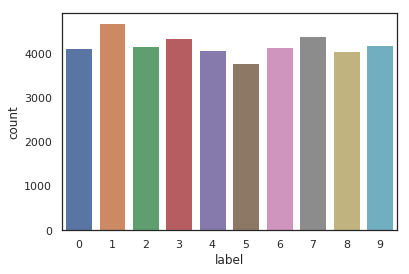

In [0]:
Y_train = train["label"]

#Drop "label" column
X_train = train.drop(labels = ["label"], axis = 1)

#free some space

del train

g = sns.countplot(Y_train)

Y_train.value_counts()

##2.2 Check for null and missing values

In [0]:
#cheque the data
X_train.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object



I check for corrupted images (missing values inside).

There is no missing values in the train and test dataset. So we can safely go ahead.



##2.3 Normalization

We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0..1] data than on [0..255].


In [0]:
#normalize data
X_train = X_train/255.0
test = test/255.0

In [0]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)



Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.


In [0]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [0]:
# Set the random seed
random_seed = 2

In [0]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

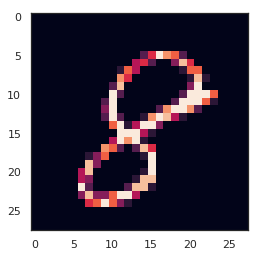

In [0]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [0]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

W0824 20:37:30.705337 140197572958080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 20:37:30.754202 140197572958080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 20:37:30.768509 140197572958080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0824 20:37:30.807973 140197572958080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0824 20:37:30.810451 140197572958080 deprecation_wrapp

In [0]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [0]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

W0824 20:38:16.033213 140197572958080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0824 20:38:16.049180 140197572958080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [0]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [0]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


Epoch 1/30
 - 8s - loss: 0.1291 - acc: 0.9607 - val_loss: 0.0503 - val_acc: 0.9852
Epoch 2/30
 - 8s - loss: 0.0951 - acc: 0.9723 - val_loss: 0.0428 - val_acc: 0.9862
Epoch 3/30
 - 8s - loss: 0.0809 - acc: 0.9762 - val_loss: 0.0299 - val_acc: 0.9900
Epoch 4/30
 - 8s - loss: 0.0730 - acc: 0.9791 - val_loss: 0.0238 - val_acc: 0.9940
Epoch 5/30
 - 8s - loss: 0.0654 - acc: 0.9809 - val_loss: 0.0302 - val_acc: 0.9926
Epoch 6/30
 - 8s - loss: 0.0628 - acc: 0.9810 - val_loss: 0.0217 - val_acc: 0.9933
Epoch 7/30
 - 8s - loss: 0.0605 - acc: 0.9825 - val_loss: 0.0226 - val_acc: 0.9931

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/30
 - 8s - loss: 0.0460 - acc: 0.9863 - val_loss: 0.0212 - val_acc: 0.9940
Epoch 9/30
 - 8s - loss: 0.0444 - acc: 0.9870 - val_loss: 0.0194 - val_acc: 0.9936
Epoch 10/30
 - 8s - loss: 0.0417 - acc: 0.9881 - val_loss: 0.0193 - val_acc: 0.9940

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 1